In [1]:
#import packags, functions and classes
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from folium.plugins import FastMarkerCluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import folium

In [2]:
vendors = pd.read_csv('/Users/da_m1_52/Downloads/Vendors.csv')
orders = pd.read_csv('/Users/da_m1_52/Downloads/orders.csv')
train_locations = pd.read_csv('/Users/da_m1_52/Downloads/train_locations.csv')
train_customers= pd.read_csv('/Users/da_m1_52/Downloads/train_customers.csv')
test_locations = pd.read_csv('/Users/da_m1_52/Downloads/test_locations.csv')
test_customers= pd.read_csv('/Users/da_m1_52/Downloads/test_customers.csv')
RestaurantR= pd.read_csv('/Users/da_m1_52/Downloads/RestaurantR.csv')

/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_9244/1642052175.py:2: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv('/Users/da_m1_52/Downloads/orders.csv')


In [4]:
vendors['vendor_id'] = vendors['id']
vendors = vendors.drop(['id'], axis=1)

In [5]:
train_customers['customer_id'] = train_customers['akeed_customer_id']
train_customers = train_customers.drop(['akeed_customer_id'], axis=1)

# test_customers['customer_id'] = test_customers['akeed_customer_id']
# test_customers = test_customers.drop(['akeed_customer_id'], axis=1)

In [6]:
orders['location_number'] = orders['LOCATION_NUMBER']
orders = orders.drop(['LOCATION_NUMBER'], axis=1)

In [7]:

orders['location_type'] = orders['LOCATION_TYPE']
orders = orders.drop(['LOCATION_TYPE'], axis=1)

In [8]:
customers = pd.concat([test_customers,train_customers], axis=0)
customers.head

<bound method NDFrame.head of       akeed_customer_id gender     dob  status  verified language  \
0               ICE2DJP   Male     NaN       1         1       EN   
1               FWNUI71   Male     NaN       1         1       EN   
2               LRX7BCH   Male     NaN       1         1       EN   
3               D96DHMD   Male     NaN       1         1       EN   
4               88Q8Y5V   Male  1997.0       1         1       EN   
...                 ...    ...     ...     ...       ...      ...   
34669               NaN    NaN     NaN       1         1      NaN   
34670               NaN    NaN     NaN       1         1      NaN   
34671               NaN    NaN     NaN       1         1      NaN   
34672               NaN    NaN     NaN       1         1      NaN   
34673               NaN    NaN     NaN       1         1      NaN   

                created_at           updated_at customer_id  
0      2018-02-07 16:45:36  2018-02-07 16:45:36         NaN  
1      2018-03-22

In [9]:
locations = pd.concat([test_locations,train_locations], axis=0)
locations.head

<bound method NDFrame.head of       customer_id  location_number location_type    latitude  longitude
0         Z59FTQD                0           NaN  126.032278  -9.106019
1         0JP29SK                0          Home    0.278709 -78.623847
2         0JP29SK                1          Home    0.124485 -78.605621
3         0JP29SK                2           NaN   -0.113891 -78.577449
4         0JP29SK                3           NaN   -0.848796   0.136726
...           ...              ...           ...         ...        ...
59498     9PP42SA                2           NaN   -0.788515 -78.497721
59499     9PP42SA                3          Home   -1.445114   0.072558
59500     9PP42SA                4           NaN   -0.001785   0.431695
59501     HWELAU8                0           NaN   -0.066291 -78.583075
59502     HWELAU8                1           NaN   -0.067043   0.648221

[76223 rows x 5 columns]>

In [11]:
Ven_Order_merge = pd.merge(vendors, orders, on='vendor_id')

# Merge 'Ven_Order_merge' and 'locations' on 'customer_id'
Ven_Order_locations_merge = pd.merge(Ven_Order_merge, locations, on='customer_id')

# Merge 'Ven_Order_locations_merge' and 'customers' on 'customer_id'
mergedDF = pd.merge(Ven_Order_locations_merge, customers, on='customer_id')

# Print the merged DataFrame
mergedDF.head()

authentication_id  latitude_x  longitude_x vendor_category_en  \
0           118597.0   -0.588596     0.754434        Restaurants   
1           118597.0   -0.588596     0.754434        Restaurants   
2           118597.0   -0.588596     0.754434        Restaurants   
3           118597.0   -0.588596     0.754434        Restaurants   
4           118786.0   -0.405660     0.644401        Restaurants   

   vendor_category_id  delivery_charge  serving_distance  is_open  \
0                 2.0              0.0               6.0      1.0   
1                 2.0              0.0               6.0      1.0   
2                 2.0              0.0               6.0      1.0   
3                 2.0              0.0               6.0      1.0   
4                 2.0              0.7               8.0      1.0   

       OpeningTime OpeningTime2  ...  latitude_y  longitude_y  \
0  11:00AM-11:30PM            -  ...   -0.603303   -78.519610   
1  11:00AM-11:30PM            -  ...   -0.603823     0.752779   
2  11:00AM-11:30PM            -  ...   -0.603303   -78.519610   
3  11:00AM-11:30PM            -  ...   -0.603823     0.752779   
4  11:59AM-10:45PM            -  ...   -0.603303   -78.519610   

  akeed_customer_id  gender  dob  status_y  verified_y language_y  \
0               NaN     NaN  NaN         1           1         EN   
1               NaN     NaN  NaN         1           1         EN   
2               NaN     NaN  NaN         1           1         EN   
3               NaN     NaN  NaN         1           1         EN   
4               NaN     NaN  NaN         1           1         EN   

            created_at         updated_at_y  
0  2019-06-12 21:14:01  2019-10-01 18:45:48  
1  2019-06-12 21:14:01  2019-10-01 18:45:48  
2  2019-06-12 21:14:01  2019-10-01 18:45:48  
3  2019-06-12 21:14:01  2019-10-01 18:45:48  
4  2019-06-12 21:14:01  2019-10-01 18:45:48  

[5 rows x 96 columns]

In [12]:
# Calculate the missing percentages for all columns
missing_perc = mergedDF.isna().sum() / mergedDF.shape[0] * 100

# Set pandas option to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the missing percentages for all columns
print(missing_perc)

authentication_id                   0.000000
latitude_x                          0.000000
longitude_x                         0.000000
vendor_category_en                  0.000000
vendor_category_id                  0.000000
delivery_charge                     0.000000
serving_distance                    0.000000
is_open                             0.000000
OpeningTime                         4.731924
OpeningTime2                        4.731924
prepration_time                     0.000000
commission                          9.250269
is_akeed_delivering                 0.000000
discount_percentage                 0.000000
status_x                            0.000000
verified_x                          0.000000
rank                                0.000000
language_x                          9.250269
vendor_rating_x                     0.000000
sunday_from_time1                   0.573606
sunday_to_time1                     0.573606
sunday_from_time2                  58.768808
sunday_to_

EDA

DROPING  NON EFFECTIVE COLUMNS

In [13]:

columns_to_drop = ['dob', 'delivery_time','delivery_date']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

 # Print the DataFrame after dropping the columns
print(mergedDF)
columns_to_drop = ['tuesday_from_time2', 'tuesday_to_time2', 'monday_from_time2', 'monday_to_time2']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = ['wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time2', 'thursday_to_time2']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = ['friday_from_time2', 'friday_to_time2', 'saturday_from_time2', 'saturday_to_time2']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

# Print the DataFrame after dropping the columns
print(mergedDF)

columns_to_drop = ['sunday_from_time2', 'sunday_to_time2']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

# Print the DataFrame after dropping the columns
print(mergedDF)

columns_to_drop = ['akeed_customer_id']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

# Print the DataFrame after dropping the columns
print(mergedDF)


columns_to_drop = ['OpeningTime2',]
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

print(mergedDF)


columns_to_drop = ['latitude_y','longitude_y']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

print(mergedDF)
'language_y'

columns_to_drop = ['language_y','location_type_y','updated_at_y']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

print(mergedDF)

'created_at_y'
columns_to_drop = ['created_at_y']
mergedDF.drop(columns_to_drop, axis=1, inplace=True)

print(mergedDF)



In [ ]:
null_counts = mergedDF.isnull().sum()
print(null_counts)

authentication_id              0
latitude_x                     0
longitude_x                    0
vendor_category_en             0
vendor_category_id             0
                           ...  
CID X LOC_NUM X VENDOR         0
location_number_x              0
location_type_x           135978
gender                     69705
created_at                     0
Length: 64, dtype: int64


In [ ]:
null_counts = mergedDF.isnull().sum()

# Filter columns with non-zero null counts
columns_with_nulls = null_counts[null_counts > 0]

# Print the columns with null values and their corresponding null counts
print("Columns with null values:")
print(columns_with_nulls)

Columns with null values:
Series([], dtype: int64)


In [41]:

#Checking for duplicates in our Dataset
duplicates = mergedDF.duplicated().sum()
duplicates

0

In [40]:
# To remove duplicates based on specific columns:
mergedDF.drop_duplicates(inplace=True)

In [69]:
#Checking datatypes in our Dataset
mergedDF.dtypes

authentication_id         float64
latitude_x                float64
longitude_x               float64
vendor_category_en         object
vendor_category_id        float64
                           ...   
CID X LOC_NUM X VENDOR     object
location_number_x           int64
location_type_x            object
gender                     object
created_at                 object
Length: 64, dtype: object

filling all the null values

In [79]:
 #gender
mergedDF['gender'].fillna(mergedDF['gender'].mode()[0], inplace=True)

#location_type_x
mergedDF['location_type_x'].fillna(mergedDF['location_type_x'].mode()[0], inplace=True)

#is_favorite
mergedDF['is_favorite'].fillna(mergedDF['is_favorite'].mode()[0], inplace=True)

#commission
mergedDF['commission'].fillna(mergedDF['commission'].mode()[0], inplace=True)

#ready_for_pickup_time
mergedDF['ready_for_pickup_time'].fillna(mergedDF['ready_for_pickup_time'].mode()[0], inplace=True)

#picked_up_time
mergedDF['picked_up_time'].fillna(mergedDF['picked_up_time'].mode()[0], inplace=True)

#delivered_time
mergedDF['delivered_time'].fillna(mergedDF['delivered_time'].mode()[0], inplace=True)

#driver_accepted_time
mergedDF['driver_accepted_time'].fillna(mergedDF['driver_accepted_time'].mode()[0], inplace=True)
if 'driver_accepted_time' in mergedDF.columns:
# Fill missing values in the 'driver_accepted_time' column with the mode
 mergedDF['driver_accepted_time'].fillna(mergedDF['driver_accepted_time'].mode()[0], inplace=True)
else:
 print("Column 'driver_accepted_time' not found in the DataFrame.")
#preparationtime
mergedDF['preparationtime'].fillna(mergedDF['preparationtime'].mode()[0], inplace=True)

#order_accepted_time
mergedDF['order_accepted_time'].fillna(mergedDF['order_accepted_time'].mode()[0], inplace=True)

#language_x
mergedDF['language_x'].fillna(mergedDF['language_x'].mode()[0], inplace=True)

#sunday_from_time1 
mergedDF['sunday_from_time1'].fillna(mergedDF['sunday_from_time1'].mode()[0], inplace=True)


 #sunday_to_time1
mergedDF['sunday_to_time1'].fillna(mergedDF['sunday_to_time1'].mode()[0], inplace=True)

#monday_from_time1 
mergedDF['monday_from_time1'].fillna(mergedDF['monday_from_time1'].mode()[0], inplace=True)
                           
#monday_to_time1 
mergedDF['monday_to_time1 '].fillna(mergedDF['monday_to_time1 '].mode()[0], inplace=True)                        
                                            
#tuesday_from_time1 
mergedDF['tuesday_from_time1'].fillna(mergedDF['tuesday_from_time1'].mode()[0], inplace=True)                             
                               
#tuesday_to_time1
mergedDF['sunday_to_time1'].fillna(mergedDF['sunday_to_time1'].mode()[0], inplace=True)                               
                               
#wednesday_from_time1 
mergedDF['tuesday_to_time1'].fillna(mergedDF['tuesday_to_time1'].mode()[0], inplace=True)  

#wednesday_to_time1 
mergedDF['wednesday_to_time1'].fillna(mergedDF['wednesday_to_time1'].mode()[0], inplace=True) 
 
#thursday_from_time1 
mergedDF['thursday_from_time1'].fillna(mergedDF['thursday_from_time1'].mode()[0], inplace=True)  

#thursday_to_time1 
mergedDF['thursday_to_time1'].fillna(mergedDF['thursday_to_time1'].mode()[0], inplace=True)    

#friday_from_time1 
friday_from_time = 'friday_from_time1 '
# Strip leading and trailing whitespaces
friday_from_time = friday_from_time.strip()
# Check if the column exists in the DataFrame
if friday_from_time in mergedDF.columns:
# Fill missing values in the column with the mode
 mergedDF[friday_from_time].fillna(mergedDF[friday_from_time].mode()[0], inplace=True)
else:
 print(f"Column '{friday_from_time}' not found in the DataFrame.")
#friday_to_time1  
mergedDF['friday_to_time1'].fillna(mergedDF['friday_to_time1'].mode()[0], inplace=True)                        
                 
#saturday_from_time1 
mergedDF['saturday_from_time1'].fillna(mergedDF['saturday_from_time1'].mode()[0], inplace=True) 

#saturday_to_time1  
mergedDF['saturday_to_time1'].fillna(mergedDF['saturday_to_time1'].mode()[0], inplace=True)             
                 
#vendor_tag  
mergedDF['vendor_tag'].fillna(mergedDF['vendor_tag'].mode()[0], inplace=True)    

#primary_tags   
mergedDF['primary_tags'].fillna(mergedDF['primary_tags'].mode()[0], inplace=True)               
                              
#vendor_tag_name              
vendor_tag_name = 'vendor_tag_name '

# Strip leading and trailing whitespaces
vendor_tag_name = vendor_tag_name.strip()

# Check if the column exists in the DataFrame
if vendor_tag_name in mergedDF.columns:
    # Fill missing values in the column with the mode
    mergedDF[vendor_tag_name].fillna(mergedDF[vendor_tag_name].mode()[0], inplace=True)
else:
    print(f"Column '{vendor_tag_name}' not found in the DataFrame.")       
             
#akeed_order_id              
mergedDF['akeed_order_id'].fillna(mergedDF['akeed_order_id'].mode()[0], inplace=True)        
       
       
#is_favorite             
mergedDF['is_favorite'].fillna(mergedDF['is_favorite'].mode()[0], inplace=True)        
                                  
         
#item_count              
mergedDF['item_count'].fillna(mergedDF['item_count'].mode()[0], inplace=True)    
#item_count              
mergedDF['item_count'].fillna(mergedDF['item_count'].mode()[0], inplace=True) 
 
# OpeningTime 
OpeningTime = 'OpeningTime '
# Strip leading and trailing whitespaces
OpeningTime = OpeningTime.strip()
# Check if the column exists in the DataFrame
if OpeningTime in mergedDF.columns:
    # Fill missing values in the column with the mode
    mergedDF[OpeningTime].fillna(mergedDF[OpeningTime].mode()[0], inplace=True)
else:
    print(f"Column '{OpeningTime}' not found in the DataFrame.")       
                  
                                

In [81]:
mergedDF

authentication_id  latitude_x  longitude_x vendor_category_en  \
0                118597.0   -0.588596     0.754434        Restaurants   
2                118597.0   -0.588596     0.754434        Restaurants   
4                118786.0   -0.405660     0.644401        Restaurants   
6                118793.0   -0.704467     0.056955        Restaurants   
8                118793.0   -0.704467     0.056955        Restaurants   
...                   ...         ...          ...                ...   
385800           132953.0   13.335131    -1.449556        Restaurants   
385801           132953.0   13.335131    -1.449556        Restaurants   
385802           132953.0   13.335131    -1.449556        Restaurants   
385803           132953.0   13.335131    -1.449556        Restaurants   
385804           132953.0   13.335131    -1.449556        Restaurants   

        vendor_category_id  delivery_charge  serving_distance  is_open  \
0                      2.0              0.0               6.0      1.0   
2                      2.0              0.0               6.0      1.0   
4                      2.0              0.7               8.0      1.0   
6                      2.0              0.7              15.0      1.0   
8                      2.0              0.7              15.0      1.0   
...                    ...              ...               ...      ...   
385800                 2.0              0.7              12.0      1.0   
385801                 2.0              0.7              12.0      1.0   
385802                 2.0              0.7              12.0      1.0   
385803                 2.0              0.7              12.0      1.0   
385804                 2.0              0.7              12.0      1.0   

            OpeningTime  prepration_time  ...  preparationtime  \
0       11:00AM-11:30PM               15  ...             45.0   
2       11:00AM-11:30PM               15  ...             45.0   
4       11:59AM-10:45PM               14  ...             45.0   
6       05:30PM-11:59PM               15  ...             45.0   
8       05:30PM-11:59PM               15  ...             45.0   
...                 ...              ...  ...              ...   
385800  11:00AM-11:00PM               20  ...             50.0   
385801  11:00AM-11:00PM               20  ...             50.0   
385802  11:00AM-11:00PM               20  ...             50.0   
385803  11:00AM-11:00PM               20  ...             50.0   
385804  11:00AM-11:00PM               20  ...             50.0   

        order_accepted_time  ready_for_pickup_time       picked_up_time  \
0       2019-12-02 22:23:53    2019-12-02 22:37:11  2019-12-02 22:48:47   
2       2019-12-02 22:23:53    2019-12-02 22:37:11  2019-12-02 22:48:47   
4       2019-12-02 22:23:53    2019-12-02 22:37:11  2019-12-02 22:48:47   
6       2019-12-02 22:23:53    2019-12-02 22:37:11  2019-12-02 22:48:47   
8       2019-12-02 22:23:53    2019-12-02 22:37:11  2019-12-02 22:48:47   
...                     ...                    ...                  ...   
385800  2020-02-28 21:58:31    2020-02-28 22:19:39  2020-02-28 22:44:27   
385801  2020-02-29 13:03:59    2020-02-29 13:23:35  2020-02-29 13:26:30   
385802  2020-02-29 21:00:30    2020-02-29 21:43:07  2020-02-29 22:02:11   
385803  2020-02-29 22:54:56    2020-02-29 23:12:19  2020-02-29 23:30:27   
385804  2020-02-29 23:27:22    2020-02-29 23:50:42  2020-02-29 23:56:39   

             delivered_time  CID X LOC_NUM X VENDOR location_number_x  \
0       2019-12-02 23:13:07         TBOTOCJ X 0 X 4                 0   
2       2019-12-02 23:13:07         TBOTOCJ X 0 X 4                 0   
4       2019-12-02 23:13:07       TBOTOCJ X 0 X 188                 0   
6       2019-12-02 23:13:07       TBOTOCJ X 0 X 195                 0   
8       2019-12-02 23:13:07       TBOTOCJ X 0 X 195                 0   
...                     ...                     ...               ...   
385800  2020-02-28 23:33:54       6PY

In [82]:
#convert to csv file
mergedDF.to_csv("RestaurantR.csv",index=False)

STATISTICS

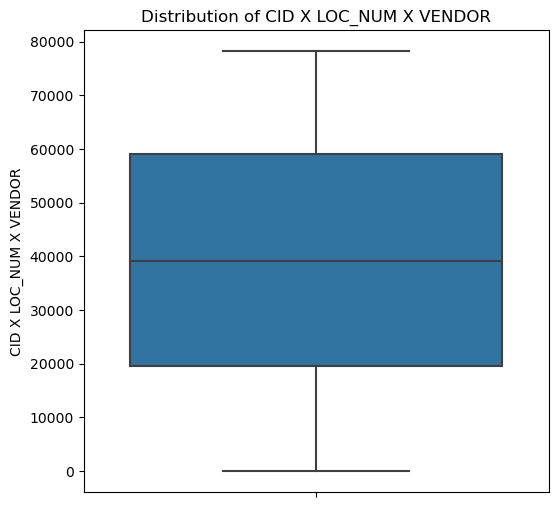

In [91]:
plt.figure(figsize=(6,6))
sns.boxplot(y=RestaurantR['CID X LOC_NUM X VENDOR'])
plt.title("Distribution of CID X LOC_NUM X VENDOR")
plt.show()

In [92]:
Q1 = RestaurantR['CID X LOC_NUM X VENDOR'].quantile(0.25)
Q3 = RestaurantR['CID X LOC_NUM X VENDOR'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 39422.5


Text(0, 0.5, 'CID X LOC_NUM X VENDOR')

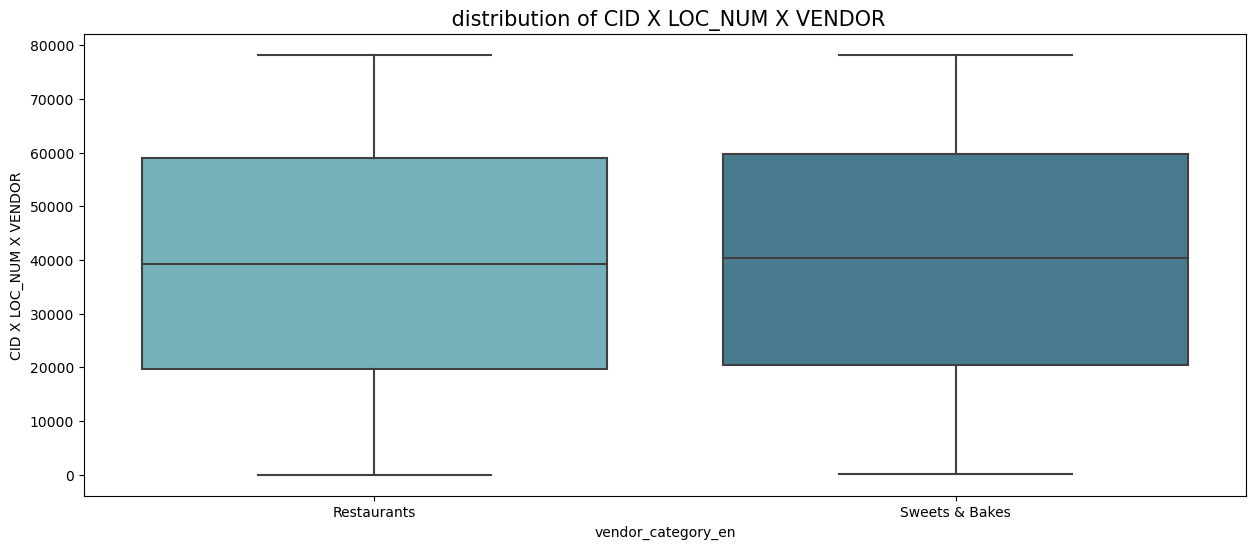

In [97]:
plt.figure(figsize=(15,6))
sns.boxplot(data=RestaurantR, x='vendor_category_en', y='CID X LOC_NUM X VENDOR', palette='GnBu_d')
plt.title(' distribution of CID X LOC_NUM X VENDOR', fontsize=15)
plt.xlabel('vendor_category_en')
plt.ylabel("CID X LOC_NUM X VENDOR")

/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_627/3347747443.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RestaurantR['CID X LOC_NUM X VENDOR'], kde=False)


Text(0.5, 1.0, 'Distribution ofCID X LOC_NUM X VENDOR')

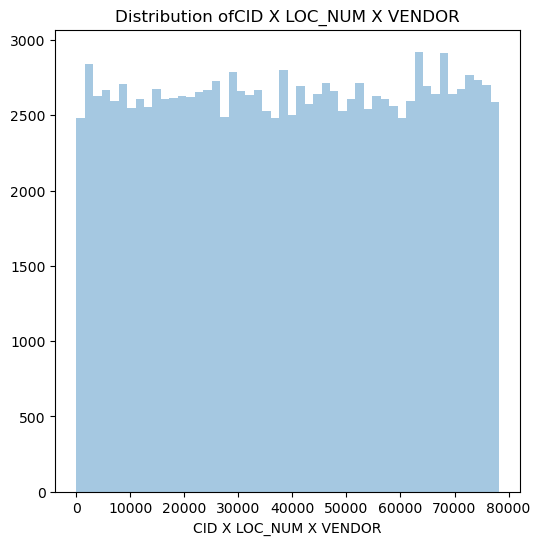

In [94]:
plt.figure(figsize=(6, 6))
sns.distplot(RestaurantR['CID X LOC_NUM X VENDOR'], kde=False)
plt.title('Distribution ofCID X LOC_NUM X VENDOR')

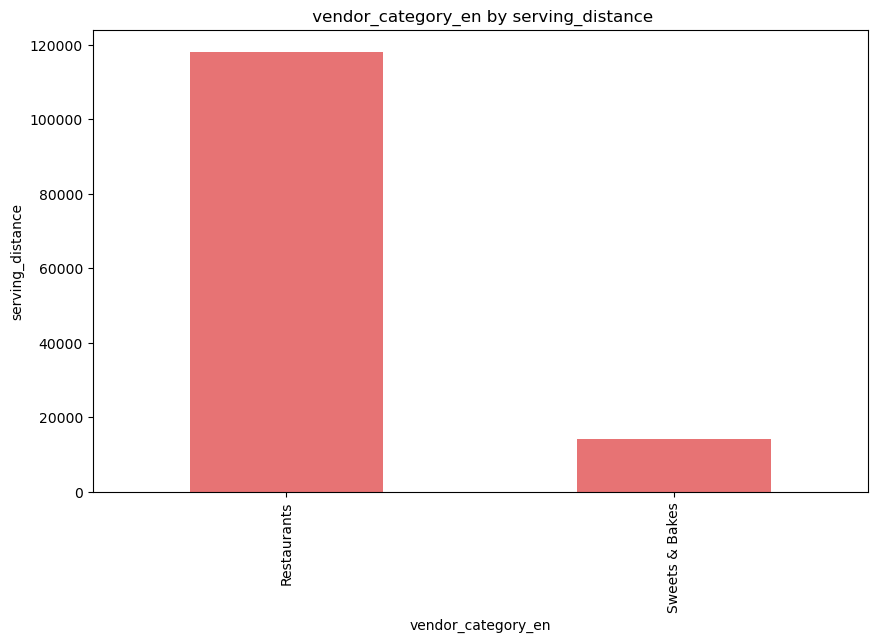

Number of vendor_category_en: 2


In [96]:
#The top 20 Neighbourhoods
count_per_neighborhood = RestaurantR['vendor_category_en'].value_counts()
top_20_neighborhoods = count_per_neighborhood.head(20)
ax = top_20_neighborhoods.plot(kind='bar', figsize=(10, 6), color='#E35A5C', alpha=0.85)
ax.set_title(" vendor_category_en by serving_distance")
ax.set_xlabel("vendor_category_en")
ax.set_ylabel("serving_distance")
plt.show()
print("Number of vendor_category_en:", len(count_per_neighborhood))

Text(0.5, 1.0, 'Percentage in Eachvendor_category_en')

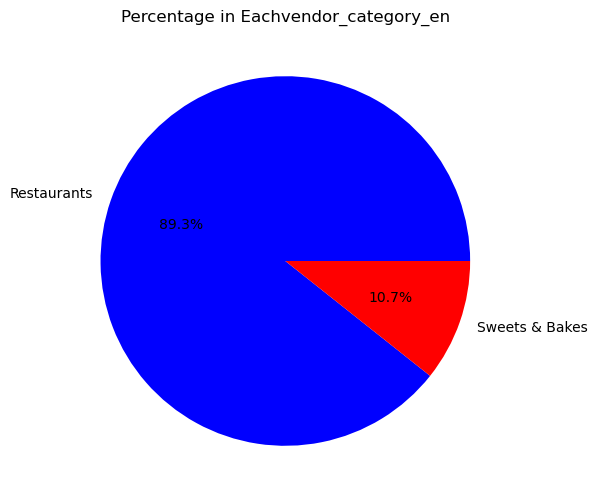

In [98]:
#distribution of Each Neighbourhood group
plt.figure(figsize=(6,6))
numbers = RestaurantR['vendor_category_en'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Percentage in Eachvendor_category_en')

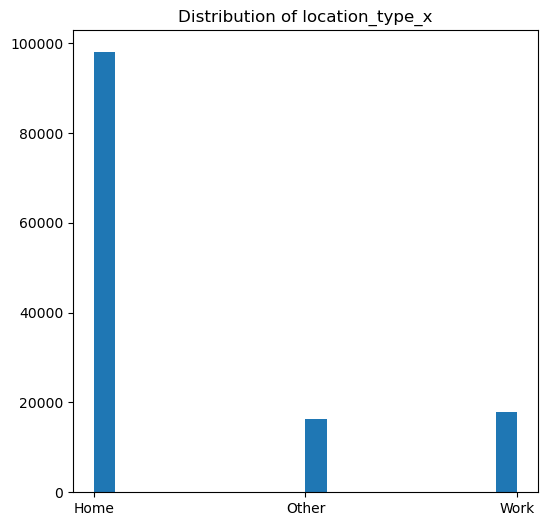

In [104]:
#Distribution of the 'latitude_x''longitude_x'
plt.figure(figsize=(6,6))
plt.hist(RestaurantR['location_type_x'], bins=20)
plt.title("Distribution of location_type_x")
plt.show()


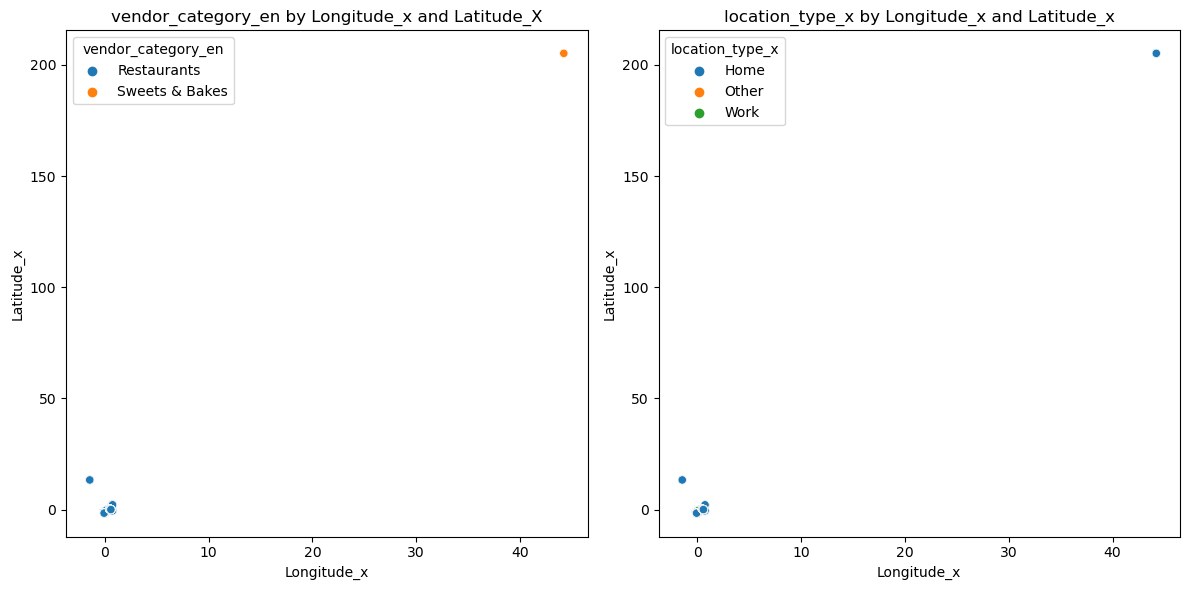

In [105]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=RestaurantR['longitude_x'], y=RestaurantR['latitude_x'], hue=RestaurantR['vendor_category_en'], ax=axs[0])
axs[0].set_title('vendor_category_en by Longitude_x and Latitude_X' )
axs[0].set_xlabel('Longitude_x')
axs[0].set_ylabel('Latitude_x')
sns.scatterplot(x=RestaurantR['longitude_x'], y=RestaurantR['latitude_x'], hue=RestaurantR['location_type_x'], ax=axs[1])
axs[1].set_title('location_type_x by Longitude_x and Latitude_x')
axs[1].set_xlabel('Longitude_x')
axs[1].set_ylabel('Latitude_x')
plt.tight_layout()
plt.show()

In [107]:
latitudes = np.array(RestaurantR['latitude_x'])
longitudes = np.array(RestaurantR['longitude_x'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

FEATURE SELECTION

###### 1. Selecting features using VIF METHOD,variance_inflation_factor, VarianceThreshold, Feature importance, Feature Emptiness


In [10]:
subset_df =RestaurantR[['authentication_id','latitude_x','longitude_x','vendor_category_en','vendor_category_id','delivery_charge','serving_distance','is_open','OpeningTime','preparationtime','order_accepted_time','ready_for_pickup_time','picked_up_time','delivered_time','CID X LOC_NUM X VENDOR','location_number_x','location_type_x','gender	created_at']]

KeyError: "['gender\\tcreated_at'] not in index"

In [11]:


# Replace inf values with a large finite value (e.g., 1e9) and fill NaN values with 0
subset_df.replace([np.inf, -np.inf], 1e9, inplace=True)
subset_df.fillna(0, inplace=True)

# Create a list of numeric column names
numeric_columns = subset_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the VIF for each numeric variable
vif = pd.DataFrame()
vif["Variable"] = numeric_columns
vif["VIF"] = [variance_inflation_factor(subset_df[numeric_columns].values, i) for i in range(len(numeric_columns))]

# Print the VIF values
print(vif)


/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_8573/4224925789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.replace([np.inf, -np.inf], 1e9, inplace=True)
/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_8573/4224925789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.fillna(0, inplace=True)


             Variable        VIF
0   authentication_id  77.212440
1          latitude_x  86.353909
2         longitude_x  89.736339
3  vendor_category_id  54.291093
4     delivery_charge   2.181739
5    serving_distance  11.769798
6             is_open   8.930225
7     prepration_time  17.447569
8   location_number_x   1.525861


In [3]:
selected_columns = ['authentication_id','latitude_x','longitude_x','vendor_category_id','delivery_charge','serving_distance','is_open','prepration_time','location_number_x']
X =RestaurantR[selected_columns] 
v_threshold = VarianceThreshold(threshold=0.5)
v_threshold.fit(X)
selected_features = v_threshold.get_support()

selected_features

array([ True,  True,  True, False, False,  True, False,  True,  True])

In [4]:
Y = RestaurantR['CID X LOC_NUM X VENDOR']
X = pd.get_dummies(RestaurantR[['authentication_id','latitude_x','longitude_x','vendor_category_en','vendor_category_id','delivery_charge','serving_distance','is_open','OpeningTime','preparationtime','order_accepted_time','ready_for_pickup_time','picked_up_time','delivered_time','location_number_x','location_type_x','gender','created_at']])
importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal', fontsize=12)
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()

: 

: 